<h1>Part 04 : Machine Learning - KNN algorithm(K-Nearest Neighbour)</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
dia = pd.read_csv('Diabetes.csv')

In [8]:
dia

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [9]:
dia = dia.rename(columns = {' Number of times pregnant' : 'num_times_preg',' Plasma glucose concentration' : 'plasma_gluc_conct', ' Diastolic blood pressure' : 'diast_blood_pres', ' Triceps skin fold thickness' : 'tric_skin_fold_thick', ' 2-Hour serum insulin' : '2h_serum_insul', ' Body mass index' : 'bmi',
                            ' Diabetes pedigree function' : 'diab_pedig_func', ' Age (years)' : 'age', ' Class variable' : 'output'})

In [10]:
dia

,num_times_preg,plasma_gluc_conct,diast_blood_pres,tric_skin_fold_thick,2h_serum_insul,bmi,diab_pedig_func,age,output
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [11]:
dia.output = dia.output.str.replace('YES', '1')
dia.output = dia.output.str.replace('NO', '0')

In [14]:
dia.output.unique()

array(['1', '0'], dtype=object)

In [17]:
x = dia[['plasma_gluc_conct', 'bmi', 'age']]

In [19]:
x.isna().sum()

plasma_gluc_conct    0
bmi                  0
age                  0
dtype: int64

In [21]:
x.shape

(768, 3)

In [22]:
y = dia['output']

In [24]:
y.isna().sum()

0

<h2>Scikit-learn library</h2>
<h7>scikit-learn (also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.</h7>

<h2>Sklearn.model_selection.train_test_split function</h2>
<h7>The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.</h7>

<h2>sklearn.neighbors.KNeighborsClassifier</h2>
<h7>Classifier implementing the k-nearest neighbors vote.</h7>

<h2>sklearn.neighbors.KNeighborsRegressor</h2>
<h7>Regression based on k-nearest neighbors.</h7>

<h2>sklearn.metrics.classification_report</h2>
<h7>Build a text report showing the main classification metrics.</h7>

<h2>sklearn.metrics.confusion_matrix</h2>
<h7>Compute confusion matrix to evaluate the accuracy of a classification.</h7>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=342334, stratify = y)
k = 3
knn = KNeighborsClassifier(metric = 'minkowski', n_neighbors = k)
knn.fit(x_train.values, y_train.values)
y_pred = knn.predict(x_test.values)
knn.score(x_test.values, y_test) * 100

70.77922077922078

<h2>sklearn.model_selection.cross_val_score</h2>
<h7>Evaluate a score by cross-validation.</h7>

In [38]:
from sklearn.model_selection import cross_val_score
k_score = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = k, metric= 'minkowski')
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
    # x : the input features to train the model. y : the output labels associated with input features. cv : the number of folds.
    # print(scores)
    # print(scores.mean())    
    k_score.append([k, scores.mean()])
print(k_score)
print()

[[1, 0.6834928229665073], [3, 0.7096035543403965], [5, 0.7291182501708817], [7, 0.7395591250854407], [9, 0.7330827067669172], [11, 0.7513328776486671], [13, 0.7617737525632263], [15, 0.7487012987012986], [17, 0.7630382775119618], [19, 0.7669514695830485], [21, 0.7604237867395762], [23, 0.7643198906356801], [25, 0.7591421736158579], [27, 0.7630895420369105], [29, 0.7591592617908408], [31, 0.7643882433356117], [33, 0.7604921394395079], [35, 0.7591934381408066], [37, 0.7604921394395079], [39, 0.7591934381408066], [41, 0.7526828434723172], [43, 0.7539815447710184], [45, 0.7487696514012303], [47, 0.7552460697197539], [49, 0.7526657552973343]]



In [61]:
k_score_max = max(k_score[i][1] for i in range(len(k_score)))
for i in range(len(k_score)):
    if k_score[i][1] == k_score_max:
        k_max = k_score[i][0]
        break
print("max_accuracy: %.2f" % (k_score_max * 100)) 
print("k_good:", k_max) 
       

max_accuracy: 76.70
k_good: 19


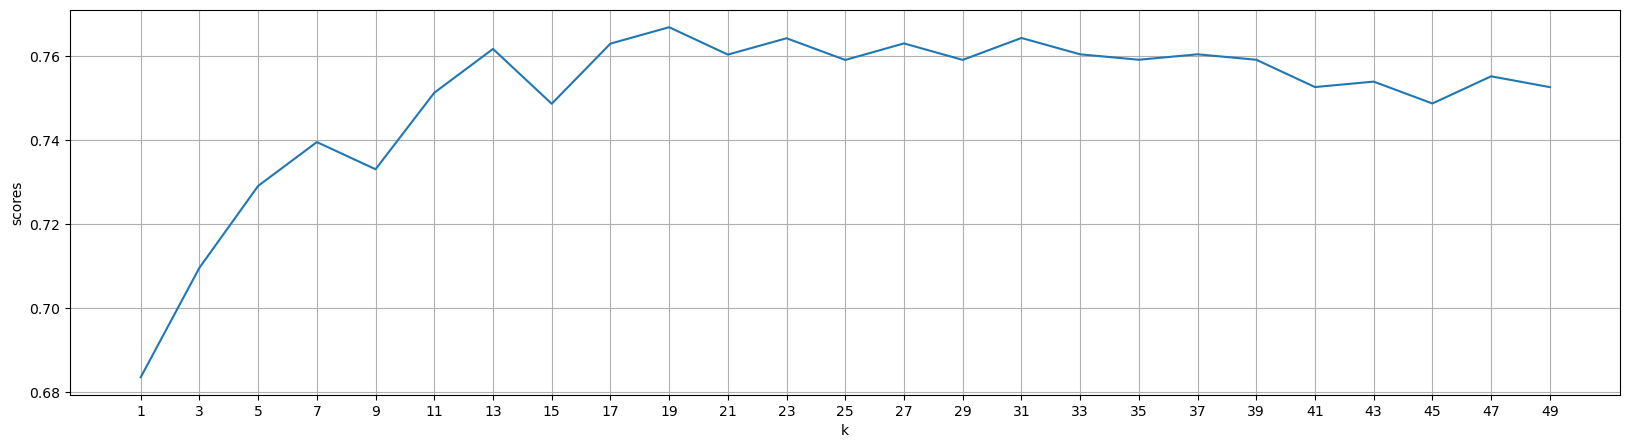

In [71]:
plt.figure(figsize=(20, 5))
plt.plot([k_score[i][0] for i in range(len(k_score))], [k_score[i][1] for i in range(len(k_score))])
plt.ylabel('scores')
plt.xlabel('k')
plt.xticks(range(1, 50, 2))
plt.grid()
plt.show()

In [68]:
len(k_score)

25